# Pink Code

## Mammography scans classifier




In [29]:
#Importar librerias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras  import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

plt.style.use("fivethirtyeight")

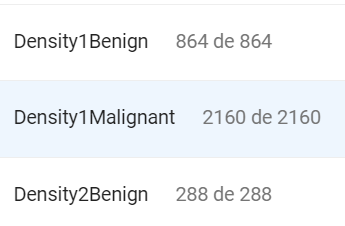

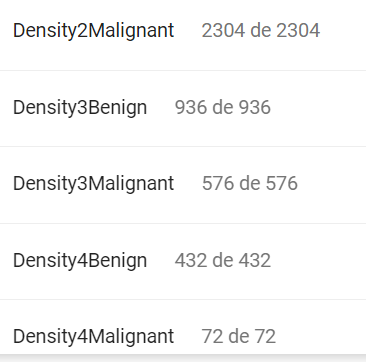

In [30]:
from PIL import Image
import glob
x_train_image_list = []
x_test_image_list = []
y_train_image_list = []
y_test_image_list = []
dir_len = [864, 2160, 288, 2304, 936, 576, 432, 72]
dir_paths = [
'Density1Benign/',
'Density1Malignant/',
'Density2Benign/',
'Density2Malignant/',
'Density3Benign/',
'Density3Malignant/',
'Density4Benign/',
'Density4Malignant/'
]
print('initiating')
x=list(zip(dir_len, dir_paths))
classif = 0
for tup in x:
  cont = 0
  classif += 1
  for filename in glob.glob( tup[1] + '*.png'):
    cont+=1
    if cont < tup[0]*.80:
      im=Image.open(filename)
      x_train_image_list.append(im)
      y_train_image_list.append(classif-1)
    if cont >= tup[0]*.80:
      im=Image.open(filename)
      x_test_image_list.append(im)
      y_test_image_list.append(classif-1)


initiating


In [31]:
CATEGORIES = ['Density 1 Benign', 'Density 1 Malignant', 'Density 2 Benign', 'Density 2 Malignant',
              'Density 3 Benign', 'Density 3 Malignant','Density 4 Benign', 'Density 4 Malignant']

In [33]:
from matplotlib import image
from numpy import asarray
lst=[]
lst_test=[]
for img in x_train_image_list:
  img = img.convert('RGB')
  rgb = np.array(img)
  lst.append(rgb)
x_train=np.array(lst)
print(type(x_train))
print(x_train.shape)

for img in x_test_image_list:
  img = img.convert('RGB')
  rgb = np.array(img)
  lst_test.append(rgb)
x_test=np.array(lst_test)
print(type(x_test))
print(x_test.shape) 
  


<class 'numpy.ndarray'>
(5988, 224, 224, 3)
<class 'numpy.ndarray'>
(637, 224, 224, 3)


In [79]:
y_train = y_train_image_list
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)

y_test = y_test_image_list
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

The image label is: [0]
The image classification is: Density 1 Benign


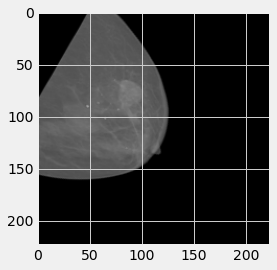

In [80]:
arr = np.arange(5988)
np.random.shuffle(arr)

x_train = [x_train[index] for index in arr]
x_train = np.array(x_train)
y_train = [y_train[index] for index in arr]
y_train = np.array(y_train)
img = plt.imshow(x_train[0])
print('The image label is:', y_train[0])
print('The image classification is:', CATEGORIES[y_train[0][0]])


In [36]:
y_train_one_hot = to_categorical(y_train, num_classes=8)
y_test_one_hot = to_categorical(y_test)

In [38]:
x_train = x_train / 255

In [39]:
x_test = x_test / 255

In [41]:
model = Sequential()

model.add( Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(8, activation='softmax'))


In [42]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [43]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=45,
                 epochs = 12,
                 )

Epoch 1/12
5988/5988 [==============================] - 232s 39ms/step - loss: 1.9465 - acc: 0.2781
Epoch 2/12
5988/5988 [==============================] - 231s 39ms/step - loss: 1.7532 - acc: 0.3029
Epoch 3/12
5988/5988 [==============================] - 231s 39ms/step - loss: 1.5786 - acc: 0.3963
Epoch 4/12
5988/5988 [==============================] - 230s 38ms/step - loss: 1.1132 - acc: 0.5897
Epoch 5/12
5988/5988 [==============================] - 231s 39ms/step - loss: 0.6204 - acc: 0.7891
Epoch 6/12
5988/5988 [==============================] - 231s 39ms/step - loss: 0.2832 - acc: 0.9045
Epoch 7/12
5988/5988 [==============================] - 230s 38ms/step - loss: 0.1663 - acc: 0.9452
Epoch 8/12
5988/5988 [==============================] - 230s 38ms/step - loss: 0.0966 - acc: 0.9701
Epoch 9/12
5988/5988 [==============================] - 230s 38ms/step - loss: 0.0749 - acc: 0.9776
Epoch 10/12
5988/5988 [==============================] - 230s 38ms/step - loss: 0.0702 - acc: 0.9786

In [45]:
model.evaluate(x_test, y_test_one_hot)[1]

637/637 [==============================] - 4s 6ms/step


0.9340659350952136

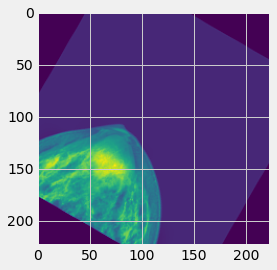

In [101]:
#MAMMOGRAFIES
#D1_B:= Density1Benign
#D2_M:= Density2Malignant
#D3_M:= Density3Malignant
#D4_B:= Density4Benign

new_image = plt.imread('Test/D4_B.png')
img = plt.imshow(new_image)

In [102]:
from skimage.transform import resize
resized_image = resize(new_image, (224, 224, 3))

In [103]:
predictions = model.predict(np.array([resized_image]))
predictions

array([[4.0317166e-14, 5.2641907e-10, 1.2174247e-18, 3.4100864e-12,
        2.3919991e-11, 2.8583582e-11, 1.0000000e+00, 4.5890158e-09]],
      dtype=float32)

In [104]:
list_index = [0, 1, 2, 3, 4, 5, 6, 7]
x = predictions

for i in range(8):
  for j in range(8):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

In [105]:
#print the first five most likely predictions
for i in range(5):
  print(CATEGORIES[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2), '%')

Density 4 Benign : 100.0 %
Density 4 Malignant : 0.0 %
Density 1 Malignant : 0.0 %
Density 3 Malignant : 0.0 %
Density 3 Benign : 0.0 %
